<a href="https://colab.research.google.com/github/mushroom3969/Kaggle/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Titanic - Machine Learning from Disaster

url : https://www.kaggle.com/c/titanic/data

# Table Introduction

* survival(Survival) - 0 = No, 1 = Yes

* pclass(Ticket class) - 1 = 1st, 2 = 2nd, 3 = 3rd

  pclass: A proxy for socio-economic status (SES)
 * 1st = Upper
 * 2nd = Middle
 * 3rd = Lower
* sex(Sex)
* Age(Age) - in years

  Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
* sibsp	# of siblings / spouses aboard the Titanic

   The dataset defines family relations in this way...

  Sibling = brother, sister, stepbrother, stepsister
  Spouse = husband, wife (mistresses and fiancés were ignored)

* parch	# of parents / children aboard the Titanic
  The dataset defines family relations in this way...

  Parent = mother, father
  Child = daughter, son, stepdaughter, stepson
  Some children travelled only with a nanny, therefore parch=0 for them.
* ticket	(Ticket number)
* fare	(Passenger fare)
* cabin	(Cabin number)
* embarked	(Port of Embarkation) -	C = Cherbourg, Q = Queenstown, S = Southampton




----
# Loading Data

## Download

In [14]:
from pathlib import Path
import requests

train_url = "https://raw.githubusercontent.com/mushroom3969/Kaggle/main/Titanic/titanic/train.csv"
test_url = "https://raw.githubusercontent.com/mushroom3969/Kaggle/main/Titanic/titanic/test.csv"
gender_submit_url = "https://github.com/mushroom3969/Kaggle/blob/main/Titanic/titanic/gender_submission.csv"


def download_data(url, filename):
  if Path(filename).is_file():
    print(f"{filename} already exist")
  else:
    req = requests.get(url)
    with open(filename, "wb") as f:
      print(f"Starting download {filename}")
      f.write(req.content)


download_data(train_url, "/content/Titanic/train.csv")
download_data(test_url, "/content/Titanic/test.csv")
download_data(gender_submit_url, "/content/Titanic/gender_submission.csv")

/content/Titanic/train.csv already exist
/content/Titanic/test.csv already exist
/content/Titanic/gender_submission.csv already exist


## Check Encoding & Size

In [16]:
import chardet
import os
import numpy as np


def check_encode_size(filename):
  line = '{:<25} {:<10} {}'.format

  # for each file, print its name, encoding & confidence in the encoding
  print(line('File Name', 'Encoding', 'Confidence'))

  for filepath in Path(filename).glob('*'):
    result = chardet.detect(filepath.read_bytes())
    print(line(str(filepath), result['encoding'], result['confidence']))
  print()
  kib = 1024
  line = '{:<25} {}'.format
  print(line('File', 'Size (KiB)'))
  for filepath in Path(filename).glob('*'):
      size = os.path.getsize(filepath)
      print(line(str(filepath), np.round(size / kib)))

check_encode_size("Titanic")

File Name                 Encoding   Confidence
Titanic/train.csv         ascii      1.0
Titanic/test.csv          ascii      1.0
Titanic/gender_submission.csv ISO-8859-1 0.73

File                      Size (KiB)
Titanic/train.csv         60.0
Titanic/test.csv          28.0
Titanic/gender_submission.csv 9.0


In [66]:
import pandas as pd

origin_df = pd.read_csv("/content/Titanic/train.csv", index_col=0)
origin_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0.5, 1.0, 'NA_cabin')

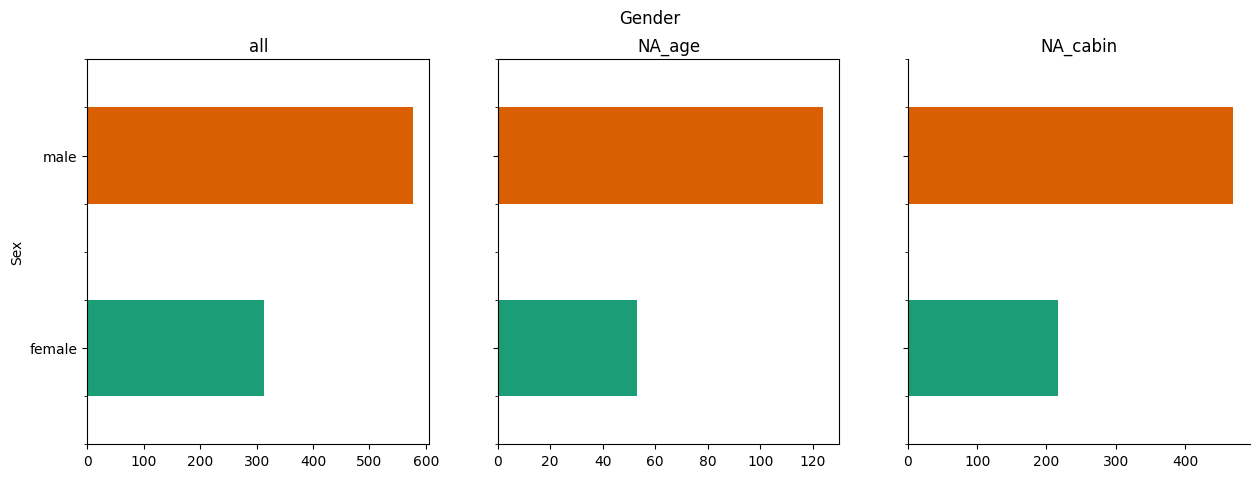

In [82]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Gender')

origin_df.groupby('Sex').size().plot(ax=axes[0], kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[0].set_title("all")

age_na_df.groupby('Sex').size().plot(ax=axes[1], kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[1].set_title("NA_age")

cabin_na_df.groupby('Sex').size().plot(ax=axes[2], kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[2].set_title("NA_cabin")


Text(0.5, 1.0, 'NA_cabin')

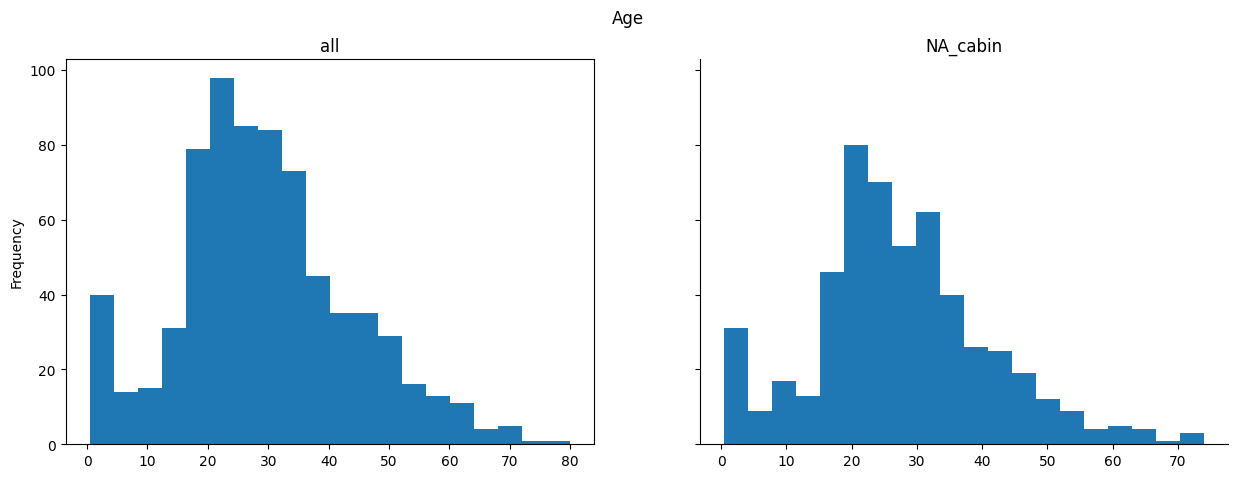

In [85]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Age')

origin_df['Age'].plot(ax=axes[0], kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[0].set_title("all")

cabin_na_df['Age'].plot(ax=axes[1], kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[1].set_title("NA_cabin")

Text(0.5, 1.0, 'NA_cabin')

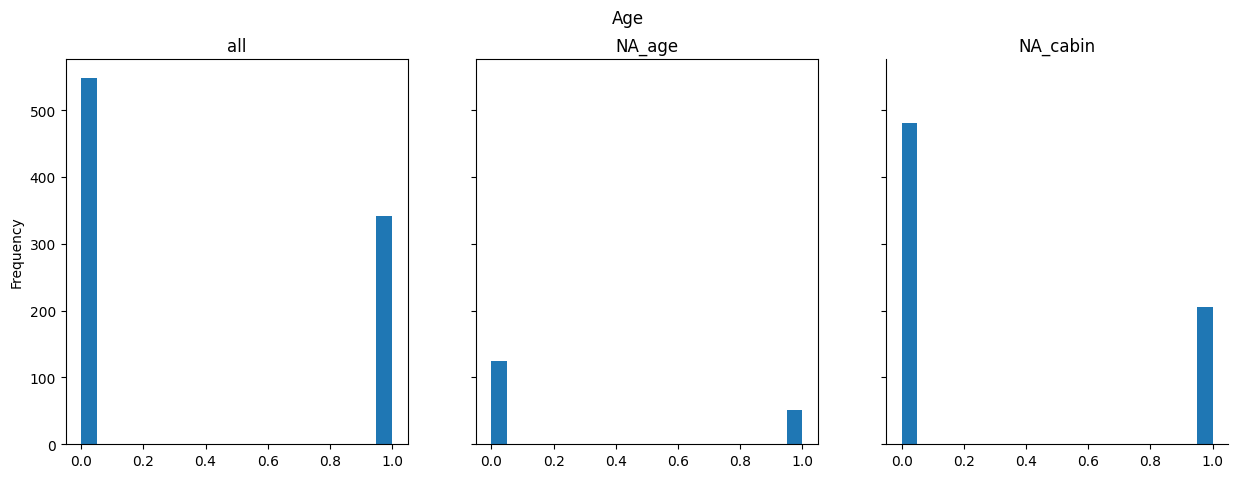

In [87]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Age')

origin_df['Survived'].plot(ax=axes[0], kind='hist', bins=20, title='SibSp')
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[0].set_title("all")

age_na_df['Survived'].plot(ax=axes[1], kind='hist', bins=20, title='SibSp')
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[1].set_title("NA_age")

cabin_na_df['Survived'].plot(ax=axes[2], kind='hist', bins=20, title='SibSp')
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[2].set_title("NA_cabin")


Text(0.5, 1.0, 'NA_cabin')

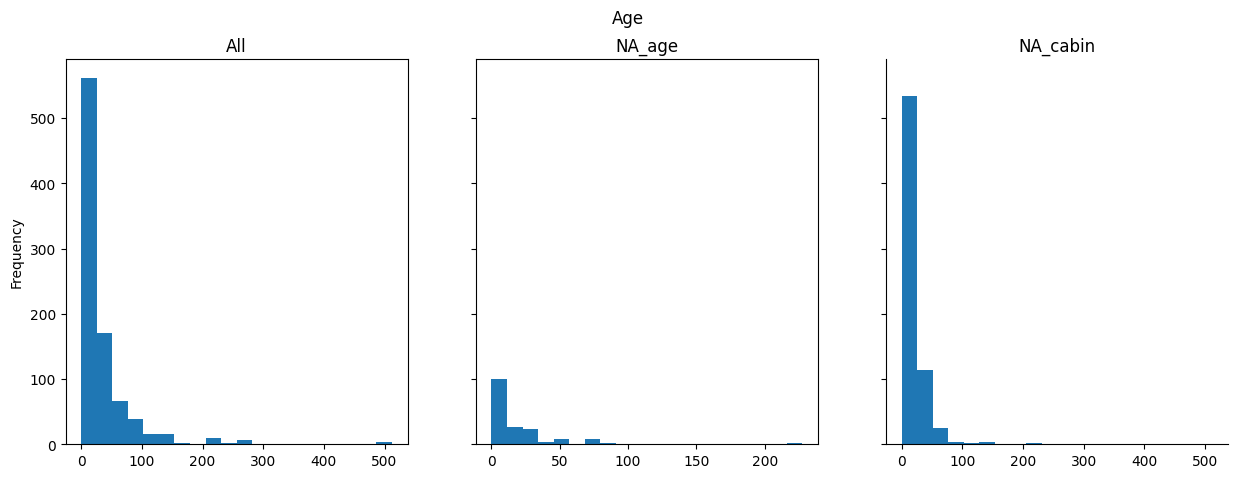

In [88]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Age')

origin_df['Fare'].plot(ax=axes[0], kind='hist', bins=20, title='Fare')
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[0].set_title("All")

age_na_df['Fare'].plot(ax=axes[1], kind='hist', bins=20, title='Fare')
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[1].set_title("NA_age")

cabin_na_df['Fare'].plot(ax=axes[2], kind='hist', bins=20, title='Fare')
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[2].set_title("NA_cabin")

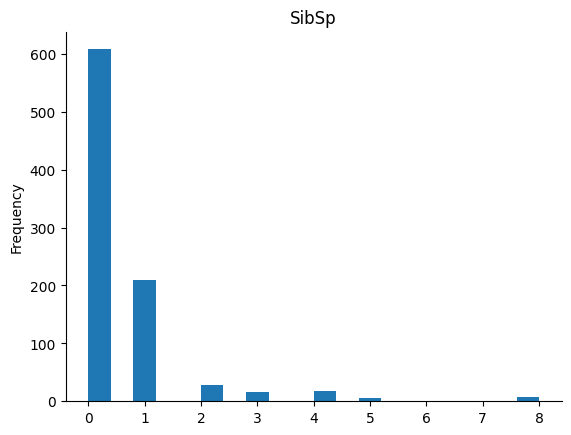

In [56]:
origin_df['SibSp'].plot(kind='hist', bins=20, title='SibSp')
plt.gca().spines[['top', 'right',]].set_visible(False)

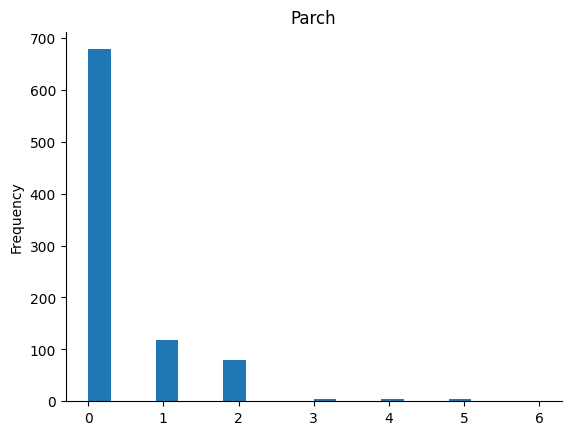

In [64]:
origin_df['Parch'].plot(kind='hist', bins=20, title='Parch')
plt.gca().spines[['top', 'right',]].set_visible(False)


In [27]:
origin_df.shape

(891, 11)

In [28]:
origin_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Check missing value

In [42]:
isna_df = origin_df.isna()
isna_df.sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
origin_df.loc[(isna_df["Age"]) | (isna_df["Cabin"]) | (isna_df["Embarked"])]

In [72]:
embark_na_df = origin_df.loc[(isna_df["Embarked"])]

In [71]:
age_na_df = origin_df.loc[(isna_df["Age"])]

In [70]:
cabin_na_df = origin_df.loc[(isna_df["Cabin"])]